In [1]:
# Suppressing warnings

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing the neccessary basic modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 - Reading the dataset

In [3]:
# Reading the dataset and storing the dataset as a dataframe.

s_bike = pd.read_csv('day.csv')
s_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the shape of s_bike dataframe

s_bike.shape

(730, 16)

In [5]:
# Checking the summary statistics of the numerical variables of s_bike dataframe

s_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Let's check the variables in the dataframe

s_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Step 2 - Data cleaning

### After having a look into the details of the variables in the dataset and checking what those variables actually mean using the data dictionary provided, there are a few things that need to be dealt with.

### E.g. -: 
1. Some of the variables need to be dropped -- 
    * instant - this is basically a record index variable, which is not neccessary for building this model.
    * casual and registered - these variables store the count of casual(non-registered) users and registered users respectively but as we already have another variable(cnt) which is also going to be our target variable, that stores the total count(i.e both casual and registered users) of rental bikes, we don't need these variables.
2. There are some variables that have values as 1,2,3,4 etc. which have specific labels associated to them, these values need to be converted into their corresponding labels as we will have to make dummy variables for these categorical variables for our linear regression model. The above described variables are -:
    * weathersit
    * season
    
### etc.

## 2.1 - Dropping some unimportant variables.

In [7]:
# Let's drop some of the obvious non-important variables(instant, casual, registered).

s_bike = s_bike.drop(['instant', 'casual', 'registered'], axis = 1)
s_bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Looking at the dataset again - dteday(date) seems to be another one of the non-important variables as much of the date related data is already present in seperate columns.

In [8]:
# Dropping dteday column.
s_bike = s_bike.drop('dteday', axis = 1)

## 2.2 - Let's also rename some of the variables for better readability(yr: year, mnth: month, hum: humidity)

In [9]:
ren_cols = {'yr': 'year', 'mnth': 'month', 'hum': 'humidity', 'cnt': 'count'}
s_bike.rename(columns = ren_cols, inplace = True)

In [10]:
s_bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## 2.3 - Converting numerical values of some categorical variables into their corresponding labels. 

In [11]:
# Let's first convert the values in season.

s_bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [12]:
# According to the data dictionary - (1:spring, 2:summer, 3:fall, 4:winter)
# Swapping the values in the season column according to the values provided in the data dictionary

s_bike.season = s_bike.season.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [13]:
# Let's check the values counts to be sure

s_bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [14]:
# Swapping the values in the month column

s_bike.month = s_bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [15]:
# Checking

s_bike.month.value_counts()

July    62
Jan     62
May     62
Dec     62
Oct     62
Aug     62
Mar     62
Sep     60
Nov     60
Apr     60
June    60
Feb     56
Name: month, dtype: int64

In [16]:
# Swapping the values in the weekday column

s_bike.weekday = s_bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [17]:
# Checking

s_bike.weekday.value_counts()

Mon    105
Tue    105
Wed    104
Sun    104
Sat    104
Fri    104
Thu    104
Name: weekday, dtype: int64

In [18]:
# Swapping the values in the weathersit column

s_bike.weathersit = s_bike.weathersit.map({1: 'Clear',2:'Mist and Cloudy',3:'Light Snow',4:'Snow and Fog'})

In [19]:
# Checking

s_bike.weathersit.value_counts()

Clear              463
Mist and Cloudy    246
Light Snow          21
Name: weathersit, dtype: int64

#### Clearly we can see that there is not a single entry for the snow and fog category.

In [20]:
# Let's do a final check of the dataframe.
s_bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 3 - Data visualisation

## Understanding the variables -: 
* In this step we can find if there is any multicollinearity going on.
* Here is where we can also check the relation of all the predictor variables with the target variable.

## 3.1 - Visualising the numerical variables

In [21]:
s_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Clearly holiday and weekday are numeric variables with binary values and year also has binary values, so obviously we wouldn't want to plot these variables with our target variable in a scatter plot.

In [22]:
#Defining styling for plot titles and labels
title_font = {'family' : 'serif', 'color' :'blue', 'weight' : '5', 'size' : 20} 
label_font = {'family' : 'serif', 'color' :'purple', 'weight' : 5, 'size' : 15}

In [23]:
# Let's store all the other numeric variables(excluding the ones mentioned above) in a variable.

num_vars = ['temp','atemp','humidity','windspeed','count']

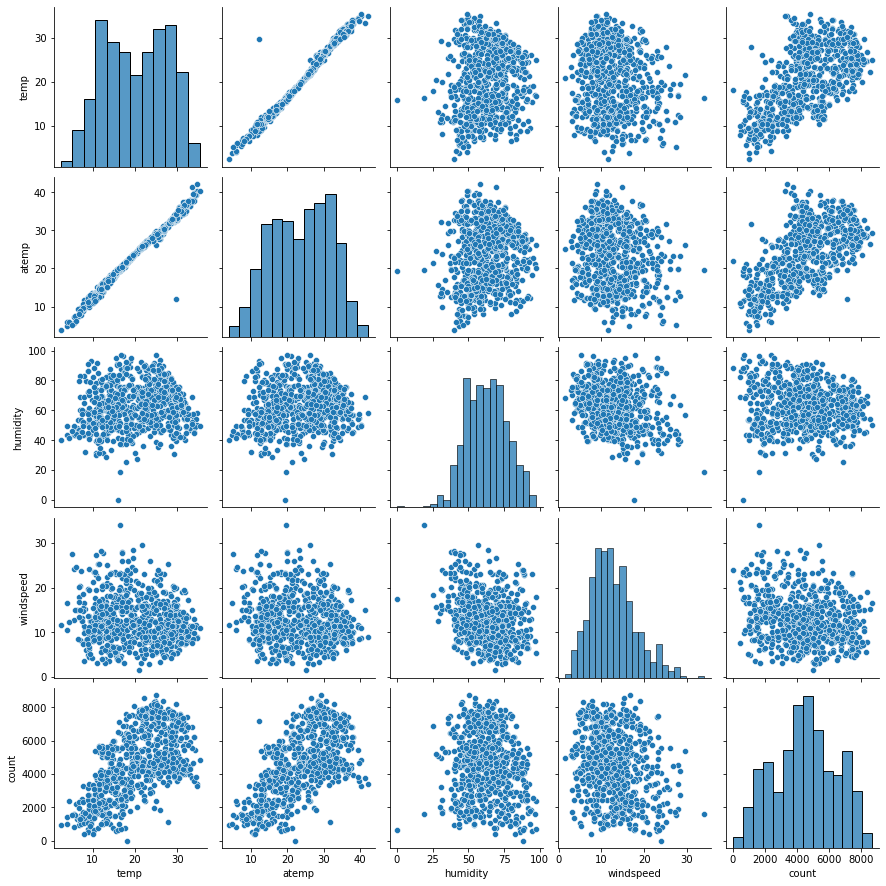

In [24]:
# Let's start with a pairplot of the numerical variables to check their relation with the target variable(count).

sns.pairplot(s_bike[num_vars])
plt.show()

#### Observations -: 
* The target variable(count) seems to have a pretty good correlation with the temperature variables.
* It is pretty obvious to state this but temp and atemp are highly correlated to each other, which mean we might have to use only one of them.

## 3.2 - Visualising the categorical variables

categorical variables -: ['year','month','holiday','season','weekday','workingday','weathersit']

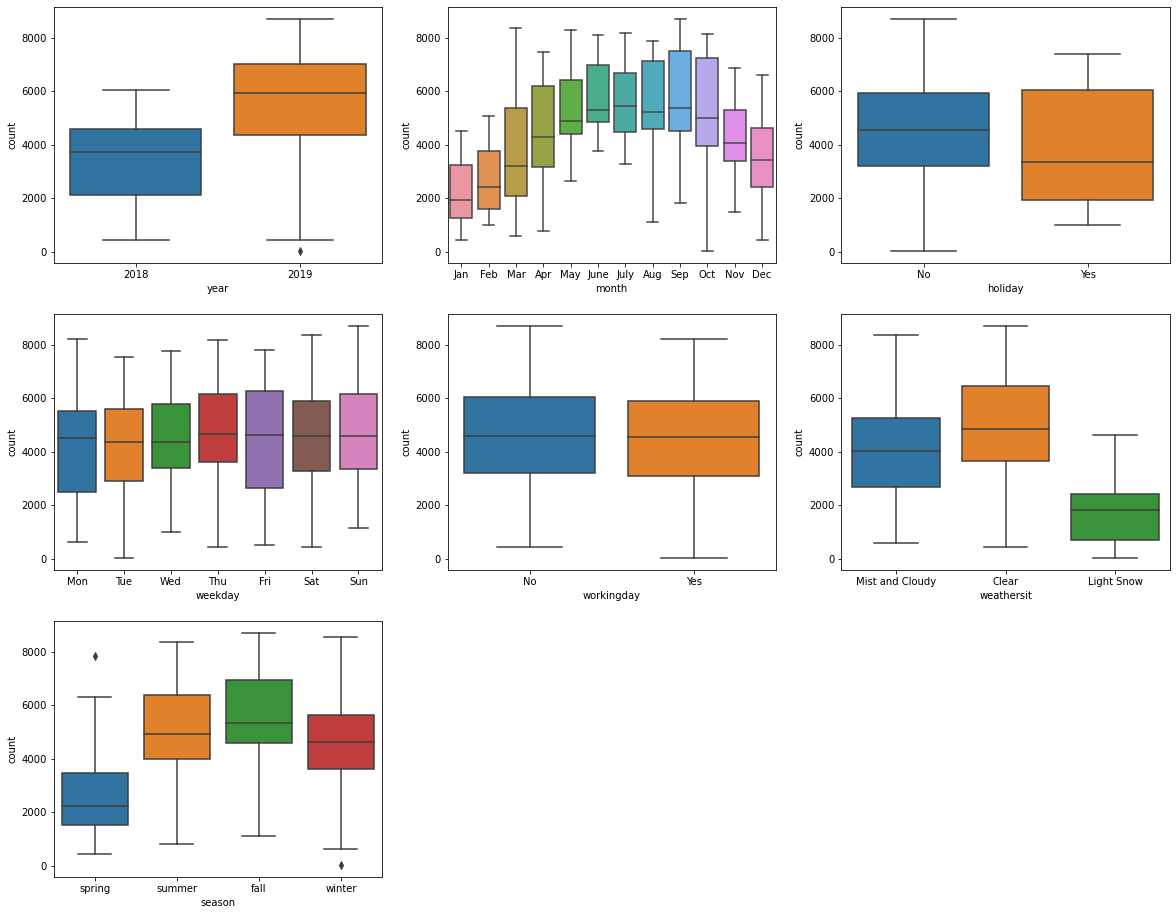

In [25]:
# Plotting the categorical variables as boxplots using subplots.
# For better readability of the plots, let's swap the binary values to their corresponding values using the data dictionary

plt.figure(figsize = (20, 16))

plt.subplot(3,3,1)
sns.boxplot(x = 'year', y = 'count', data = s_bike)
plt.xticks([0,1],[2018,2019])

plt.subplot(3,3,2)
sns.boxplot(x = 'month', y = 'count', data = s_bike)

plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'count', data = s_bike)
plt.xticks([0,1],['No','Yes'])

plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'count', data = s_bike)

plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'count', data = s_bike)
plt.xticks([0,1],['No','Yes'])

plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'count', data = s_bike)

plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'count', data = s_bike)

plt.show()

# The reason behind using boxplots is that it shows the descriptive statistics of the given data.

#### Observation -:
* From year plot we can see that there are more rentals in the year 2019 compared to 2018, although we cannot make any kind of conclusions just by looking at this plot.
* Fall and summer season seem to have more bike rentals compared to other seasons, but then again summer season and winter season are kind of neck to neck, so no conclusion can be made just yet.
* Looking at the month plot, one thing can be observed, bike rentals increase near the middle of the year and then settle back near the year end.
* clear weather situation seems to have more bike rentals followed by Mist and cloudy weather.

NOTE-: The above conclusions are fairly rough and are made in an attempt to get an idea of the relationship of these variables with the target variable.

## 3.2 - Some more visualisations...

#### As seen in the previous subplots, the month vs. count plot seemed like it had some kind of pattern, so let's plot the month vs. count plot again but this time let's also add the year variable as hue in a barplot.

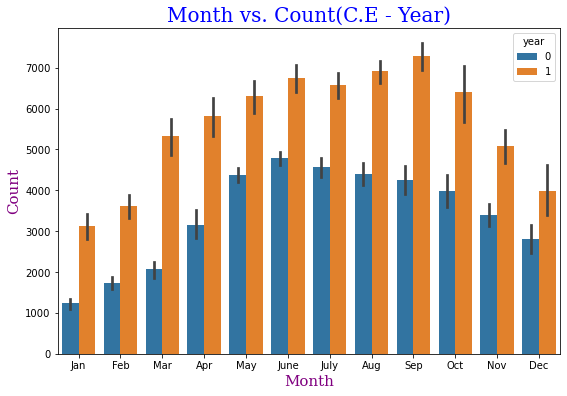

In [26]:
# Plotting a bar plot for month vs. count on year.
# In the plot 0 means 2018 and 1 means 2019

plt.figure(figsize = (9,6))
sns.barplot(x = 'month', y = 'count', hue = 'year', data = s_bike)
plt.title('Month vs. Count(C.E - Year)', fontdict = title_font)
plt.xlabel('Month', fontdict = label_font)
plt.ylabel('Count', fontdict = label_font)

plt.show()

#### Observations -:
* That does seem like a pattern there.
* Also as observed earlier there are significantly more rentals in 2019 compared to 2018

Not Important - (Rough assumptions - It could be that in 2019 the company improved their services or increased their marketing expenditure).

C.E :- color encoding

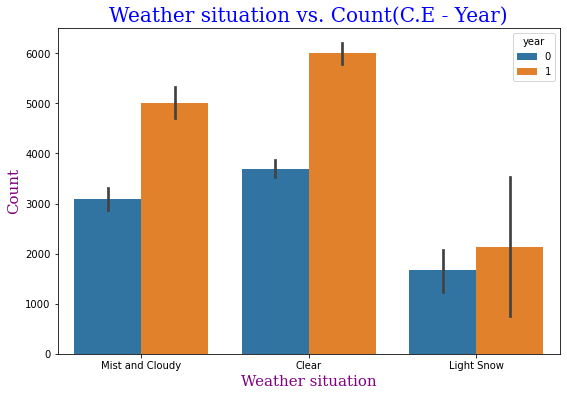

In [27]:
# Plotting a bar plot for weathersit vs. count on year.

plt.figure(figsize = (9,6))
sns.barplot(x = 'weathersit', y = 'count', hue = 'year', data = s_bike)
plt.title('Weather situation vs. Count(C.E - Year)', fontdict = title_font)
plt.xlabel('Weather situation', fontdict = label_font)
plt.ylabel('Count', fontdict = label_font)

plt.show()

#### Observations -: 
* This is also showing a similar kind of trend that the previous plot showed, rental count tends to be lower in cold weather situations.

### Also in the pairplot, It can be seen that temperature variables seemed to have some kind of a linear relationship with the target variable.

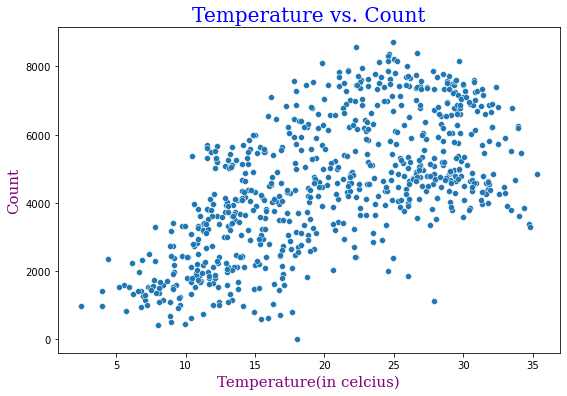

In [28]:
# Let's plot the scatter plot again to see that in detail.

plt.figure(figsize = (9,6))
sns.scatterplot(x = 'temp', y = 'count', data = s_bike)
plt.title('Temperature vs. Count', fontdict = title_font)
plt.xlabel('Temperature(in celcius)', fontdict = label_font)
plt.ylabel('Count', fontdict = label_font)

plt.show()

#### Observations -:
* Looking at this plot, in general the count variable is showing a positive correlation to the Temperature, i.e as the temperature is increasing the rental count is also showing an increase.
* This can also be confirmed by the previous barplot, the rental count seemed to increase in the summer months which is reaffirmed by this scatter plot.

#### Note -: The above performed are just some basic(primary) exploratory observations, this process is not to be confused with the feature selection process, the feature variable selection will be based on multiple things like correlation with the target variable, multicollinearity, their significance etc.

### Now, there is another temperature variable that stores the feeling temeperature. Let's also plot that w.r.t the target variable just to get an idea.

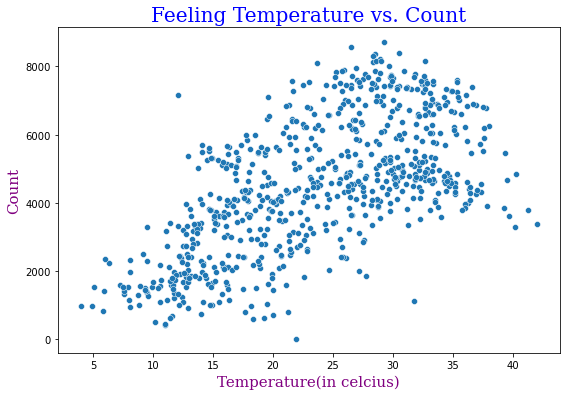

In [29]:
# Plotting a scatter plot for feeling temperature vs. count.

plt.figure(figsize = (9,6))
sns.scatterplot(x = 'atemp', y = 'count', data = s_bike)
plt.title('Feeling Temperature vs. Count', fontdict = title_font)
plt.xlabel('Temperature(in celcius)', fontdict = label_font)
plt.ylabel('Count', fontdict = label_font)

plt.show()

#### Observations -: 
* As anticipated the plot is nearly identical to the temperature plot, which is not a surprise.


### Let's now see the correlation coefficients of the numerical variables.

In [30]:
bike_corr = s_bike.corr()
bike_corr

,year,holiday,workingday,temp,atemp,humidity,windspeed,count
year,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
count,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


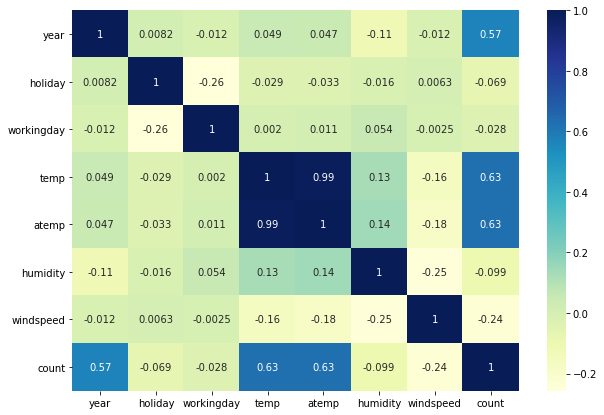

In [31]:
# Let's also plot a heatmap for the correlations for better readability

plt.figure(figsize = (10,7))
sns.heatmap(data = bike_corr, cmap = 'YlGnBu', annot = True)

plt.show()

# Step 4 - Data preparation

### Let's take a look at the dataframe to see if we need to perform any operations on any of the variables or not.

In [32]:
s_bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Observations -:
* The variables seem to be in correct formats.


### Next steps -:
* Now we need to create dummy variables for 'season','weekday','month','weathersit'
* We will also need to scale the variables(using minmax scaling here).

## Dummy variable creation

In [33]:
# creating dummy variables for the above mentioned variables('season','weekday','month','weathersit')

season_dummies = pd.get_dummies(s_bike.season, drop_first = True)
weekday_dummies = pd.get_dummies(s_bike.weekday, drop_first = True)
month_dummies = pd.get_dummies(s_bike.month, drop_first = True)
weathersit_dummies = pd.get_dummies(s_bike.weathersit, drop_first = True)

In [34]:
s_bike = pd.concat([s_bike, season_dummies, weekday_dummies, month_dummies, weathersit_dummies], axis = 1)

In [35]:
# Dropping season, weekday, month and weathersit as their dummies are already created.

s_bike.drop(['season','weekday','month','weathersit'], axis = 1, inplace = True)

In [36]:
s_bike.shape

(730, 30)

In [37]:
s_bike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,Jan,July,June,Mar,May,Nov,Oct,Sep,Light Snow,Mist and Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,1,0,0,0,0,0,0,0,0,0


# Step 5 - Splitting the data into training and testing sets

In [38]:
# Importing the required libraries to split the data into training and test data.

from sklearn.model_selection import train_test_split

In [39]:
# Creating training and test sets(70% training, 30% test)

np.random.seed(0)
df_train, df_test = train_test_split(s_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
print('No. of rows in train set are', df_train.shape[0], '\nNO. of rows in test set are', df_test.shape[0])

No. of rows in train set are 510 
NO. of rows in test set are 219


## Now it's time to rescale the continuous numerical variables.

### There are two ways to rescale variables -:
* Min-Max scaling (normalisation) : (x - xmin)/(xmax - xmin)
* Standardisation (mean-0, sigma-1) : (x - mu)/sigma

### In this model I will be using minmax scaling

In [41]:
# Importing the required libraries for rescaling

from sklearn.preprocessing import MinMaxScaler

In [42]:
# Instantiating an object

scaler = MinMaxScaler()

#### Below mentioned is the explanation for fit, transform and fit_transform functions.

* fit() : Learns xmin, xmax
* transform() : applies x-xmin/xmax-xmin
* fit_transform() : Self-explanatory

In [43]:
# We already have all the numerical non-binary variables stored in a variable num_vars, so let's use that again here.

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,Jan,July,June,Mar,May,Nov,Oct,Sep,Light Snow,Mist and Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,1


In [44]:
# To be double sure let's check the summary statistics of the numeric variables

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,Jan,July,June,Mar,May,Nov,Oct,Sep,Light Snow,Mist and Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


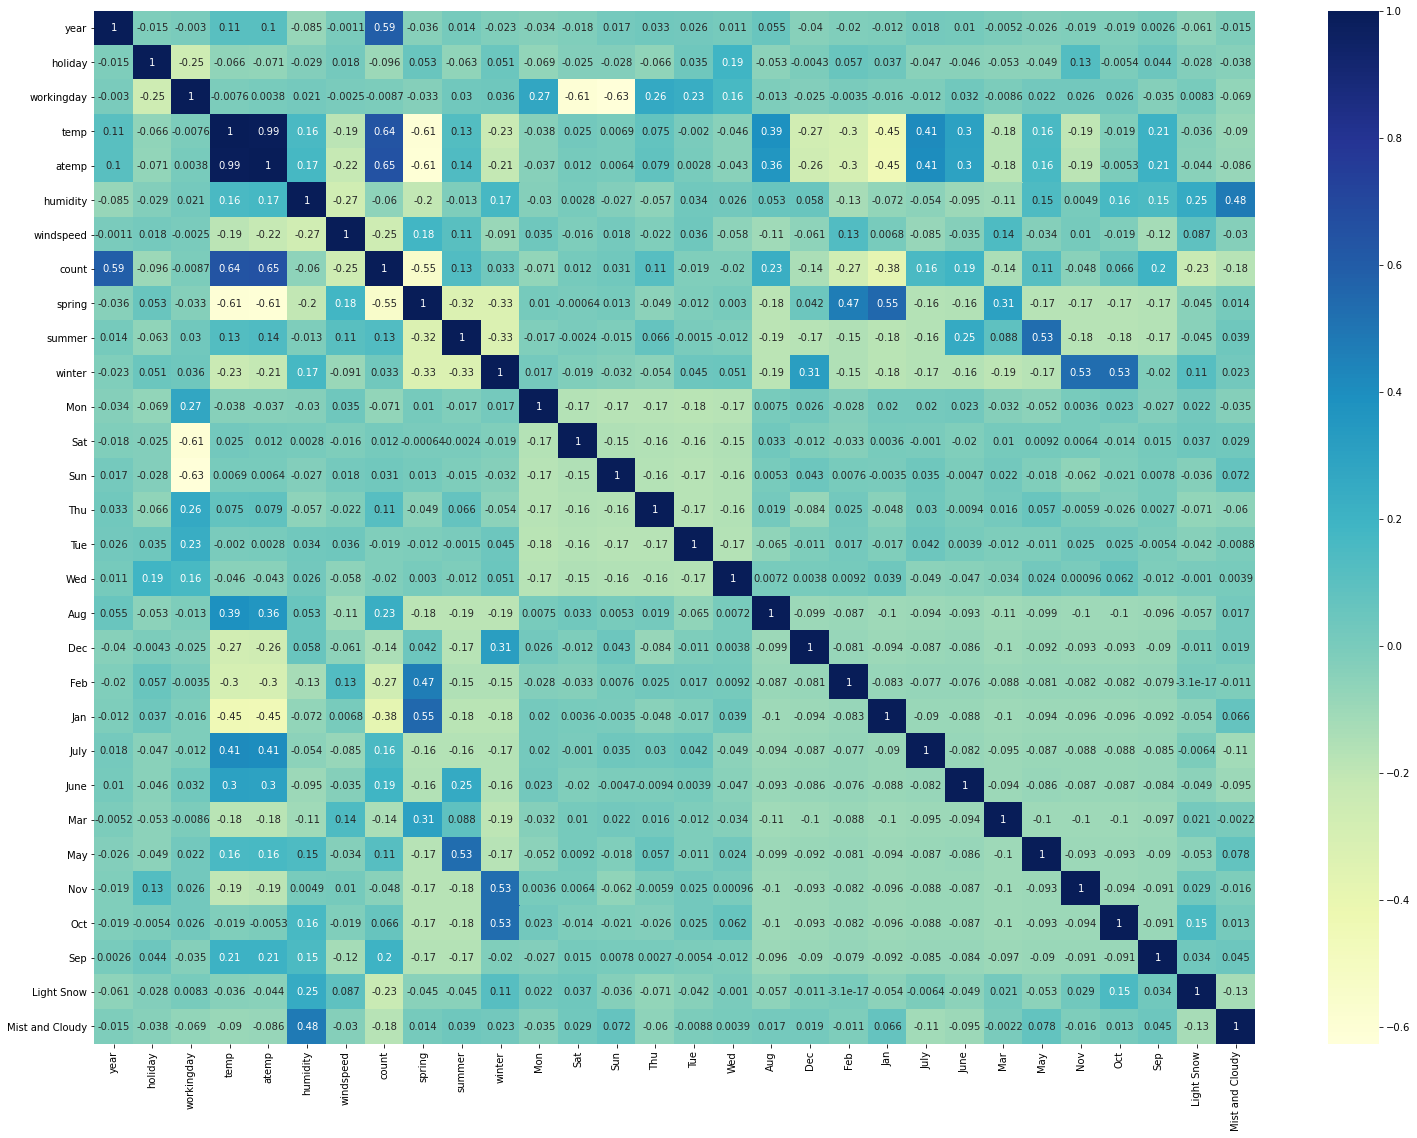

In [45]:
# Let's also plot a heatmap to check the correlation coefficients of the variables.

plt.figure(figsize = (26,19))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

#### Note -: This heatmap is plotted to use as a reference for the correlation of the numeric variables.

#### Observations -: 
* We already know the temperature variables are highly correlated to the target variable.
* As obvious as it is, temp and atemp are highly correlated which is obviously not good for our model.

### Let's now divide the training dataframe into X and y training sets for model building

In [46]:
# Dividing df_train into X and y

y_train = df_train.pop('count')
X_train = df_train

In [47]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,spring,summer,winter,...,Jan,July,June,Mar,May,Nov,Oct,Sep,Light Snow,Mist and Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

### Since there are 29 variables including the target variable, In this model building process I am going to use Recursive Feature Elimination(RFE) and will also be using the LinearRegression module from the scikit learn package.

In [49]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
# Instantiating an object for the LinearRegression class

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [51]:
# Now it's time to run RFE

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

# Here rfe.support indicates whether or not a feature was selected and rfe.ranking is the ranking of the features.

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Light Snow', True, 1),
 ('Mist and Cloudy', True, 1)]

In [53]:
# Let's store the selected columns in a list

sel_cols = X_train.columns[rfe.support_]
sel_cols

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow',
       'Mist and Cloudy'],
      dtype='object')

In [54]:
# Creating a new dataframe to store these selected variables

X_train_rfe = X_train[sel_cols]
X_train_rfe.head()

,year,holiday,temp,humidity,windspeed,spring,summer,winter,Dec,Jan,July,Nov,Sep,Light Snow,Mist and Cloudy
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1


## ------------------------------------------------------ MODEL - 1 ---------------------------------------------------------------

## Building a model using statsmodel, to get a more detailed statistical overview.

In [55]:
# Importing required libraries

import statsmodels.api as sm  

In [56]:
# Adding a constant variable

X_train_rfe_model_1 = sm.add_constant(X_train_rfe)

In [57]:
# Building model

lr = sm.OLS(y_train, X_train_rfe_model_1)

lr_model = lr.fit()

In [58]:
# Checking the summary of our model

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          3.34e-189
Time:                        20:10:48   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3202      0.036     

#### Observations -:
* Clearly the r2 value and adjusted r2 value are both very high which means, nearly 84% of the variance in rental count is explained by these variables.
* Looking at the p values, there are a few variables that might be insignificant in the presence of other variables.

## Another important thing to consider is the multicollinearity within the selected feature variables.

## To keep the above issue in check we will have to check the variance inflation factor(VIF) for each of the selected feature variables.
### Mentioned below is the formula for calculating VIF
### $ VIF_i = \frac{1}{1 - {R_i}^2} $

### This is the criteria I am going to use to check the importance and significance of a feature variable for this model building process
There could be three possible situations:
- High p-value, High VIF -: DROP the variable

- High-Low -: ?(Question)
    - High p-value, Low VIF -: Remove these first
    - Low p-value, High VIF -: Remove these after the ones above
    
- Low p-value, Low VIF -: Don't DROP the variable

In [59]:
# Importing required libraries

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# Checking for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,Mist and Cloudy,2.32
0,year,2.09
11,Nov,1.83
9,Jan,1.75


#### Observation -:
* Humidity has a very high VIF value but according to its p value it is significant

## ------------------------------------------------------ MODEL - 2 ---------------------------------------------------------------

### Let's try rebuilding the model without humidity, to see how the statistics change.

In [61]:
# Rebuilding the model without humidity

X_train_try = X_train_rfe.drop('humidity', axis = 1)

In [62]:
# Adding constant

X_train_sm_rfe_model_2 = sm.add_constant(X_train_try)

# Building model

lr = sm.OLS(y_train, X_train_sm_rfe_model_2)
lr_model = lr.fit()

In [63]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.57e-186
Time:                        20:10:48   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2466      0.032     

In [64]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train_try.columns
vif['VIF'] = [variance_inflation_factor(X_train_try.values, i) for i in range(X_train_try.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,year,2.07
10,Nov,1.80
8,Jan,1.66
9,July,1.59
13,Mist and Cloudy,1.56


#### Observations -:
* After removing humidity, the r2 and adjusted r2 values seem almost unchanged.
* Also the VIF of temp variable is significantly improved.
* According to our criteria summer has a high p value compared to other variables and it's VIF is 2.23, we might try dropping it this time around.

## ------------------------------------------------------ MODEL - 3 ---------------------------------------------------------------

### Let's try rebuilding the model without summer, to see how the statistics change.

In [65]:
# Rebuilding the model without summer

X_train_try_2 = X_train_try.drop('summer', axis = 1)

In [66]:
# Adding constant

X_train_sm_rfe_model_3 = sm.add_constant(X_train_try_2)

# Building model

lr = sm.OLS(y_train, X_train_sm_rfe_model_3)
lr_model = lr.fit()

In [67]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.08e-186
Time:                        20:10:48   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2893      0.025     

In [68]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train_try_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_try_2.values, i) for i in range(X_train_try_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.54
4,spring,2.36
0,year,2.06
9,Nov,1.80
7,Jan,1.65
12,Mist and Cloudy,1.53
6,Dec,1.46
8,July,1.36


#### Observations -:
* Dropping summer brought a positive change to the model, i.e. it decreased the VIF value of temperature and brought it down to 5
* The p-value of November seems high compared to other variables let's try dropping it and see it's affect on the statistical metrics.

## ------------------------------------------------------ MODEL - 4 ---------------------------------------------------------------

### Let's try rebuilding the model without Nov, to see how the statistics change.

In [69]:
# Rebuilding the model without november

X_train_try_3 = X_train_try_2.drop('Nov', axis = 1)

In [70]:
# Adding constant

X_train_sm_rfe_model_4 = sm.add_constant(X_train_try_3)

# Building model

lr = sm.OLS(y_train, X_train_sm_rfe_model_4)
lr_model = lr.fit()

In [71]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.02e-186
Time:                        20:10:48   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2769      0.025     

In [72]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train_try_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_try_3.values, i) for i in range(X_train_try_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.36
0,year,2.06
5,winter,1.64
7,Jan,1.64
11,Mist and Cloudy,1.53
8,July,1.36
6,Dec,1.29
9,Sep,1.20


#### Observations -:
* After removing Nov, p-value for december increased significantly.
* Dropping Dec next seems like a good idea.
* Both r2 and adjusted r2 values are acceptable and good to go

## ------------------------------------------------------ MODEL - 5 ---------------------------------------------------------------

### Let's try rebuilding the model without Dec, to see how the statistics change.

In [73]:
# Rebuilding the model without December

X_train_try_4 = X_train_try_3.drop('Dec', axis = 1)

In [74]:
# Adding constant

X_train_sm_rfe_model_5 = sm.add_constant(X_train_try_4)

# Building model

lr = sm.OLS(y_train, X_train_sm_rfe_model_5)
lr_model = lr.fit()

In [75]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.13e-186
Time:                        20:10:48   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2657      0.025     

In [76]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train_try_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_try_4.values, i) for i in range(X_train_try_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.25
0,year,2.06
6,Jan,1.60
10,Mist and Cloudy,1.53
5,winter,1.40
7,July,1.36
8,Sep,1.20
9,Light Snow,1.08


#### Observations -: 
* Now the p-value of january seems to have increased.
* The r2 and adjusted r2 values are both nearly unchanged

## ------------------------------------------------------ MODEL - 6 ---------------------------------------------------------------

### Let's try rebuilding the model without Jan, to see how the statistics change.

In [77]:
# Rebuilding the model without January

X_train_try_5 = X_train_try_4.drop('Jan', axis = 1)

In [78]:
# Adding constant

X_train_sm_rfe_model_6 = sm.add_constant(X_train_try_5)

# Building model

lr = sm.OLS(y_train, X_train_sm_rfe_model_6)
lr_model = lr.fit()

In [79]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.16e-186
Time:                        20:10:48   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2519      0.024     

In [80]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train_try_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_try_5.values, i) for i in range(X_train_try_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,year,2.06
4,spring,1.65
9,Mist and Cloudy,1.51
5,winter,1.40
6,July,1.35
7,Sep,1.20
8,Light Snow,1.08
1,holiday,1.04


#### Observations -: 
* The p-values and VIF of all the variables seem to be within the acceptable range
* Both r2 and adjusted r2 values are also good to go.
* This seems like the best model out of all so let's proceed with this one.

# Step 6 - Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let's plot the histogram of the error terms and see what it looks like.


In [81]:
# Applying the model

y_train_pred = lr_model.predict(X_train_sm_rfe_model_6)

In [82]:
y_train_pred.head()

653    0.721404
576    0.744276
426    0.458083
728    0.393135
482    0.557132
dtype: float64

In [83]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

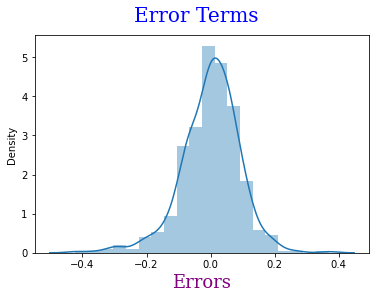

In [84]:
# Plotting the histogram of the error terms

fig = plt.figure()
res = y_train - y_train_pred

sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontdict = title_font, fontsize = 20)                 
plt.xlabel('Errors', fontdict = label_font, fontsize = 18)      
plt.show()

### So far everything looks great

# Step 7 - Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [85]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [86]:
# Let's now drop all the unwanted variables

u_vars = list(X_train_try_5.columns)
u_vars.append('count')
u_vars

['year',
 'holiday',
 'temp',
 'windspeed',
 'spring',
 'winter',
 'July',
 'Sep',
 'Light Snow',
 'Mist and Cloudy',
 'count']

In [87]:
df_test = df_test[u_vars]
df_test.head()

,year,holiday,temp,windspeed,spring,winter,July,Sep,Light Snow,Mist and Cloudy,count
184,0,1,0.831783,0.084219,0,0,1,0,0,1,0.692706
535,1,0,0.901354,0.153728,0,0,0,0,0,0,0.712034
299,0,0,0.511964,0.334206,0,1,0,0,0,1,0.303382
221,0,0,0.881625,0.339570,0,0,0,0,0,0,0.547400
152,0,0,0.817246,0.537414,0,0,0,0,0,0,0.569029


In [88]:
df_test.describe()

,year,holiday,temp,windspeed,spring,winter,July,Sep,Light Snow,Mist and Cloudy,count
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.558941,0.313350,0.255708,0.232877,0.105023,0.086758,0.027397,0.319635,0.520592
std,0.500722,0.188034,0.233698,0.159947,0.437258,0.423633,0.307285,0.282125,0.163612,0.467403,0.218435
min,0.000000,0.000000,0.046591,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048205
25%,0.000000,0.000000,0.354650,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377531
50%,0.000000,0.000000,0.558691,0.299459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524275
75%,1.000000,0.000000,0.759096,0.403048,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.672745
max,1.000000,1.000000,0.984424,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.963300


#### Dividing into X_test and y_test

In [89]:
y_test = df_test.pop('count')
X_test = df_test

In [90]:
# Adding constant variable to test dataframe

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,year,holiday,temp,windspeed,spring,winter,July,Sep,Light Snow,Mist and Cloudy
184,1.0,0,1,0.831783,0.084219,0,0,1,0,0,1
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0,0


In [91]:
# Making predictions using the model

y_test_pred = lr_model.predict(X_test_sm)

## R-squared score on the test set

In [92]:
# Calculating the R-squared score on the test set

from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8070101019557963

# Step 8 - Model evaluation

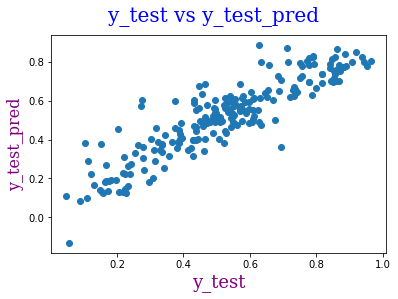

In [93]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontdict = title_font, fontsize = 20)              
plt.xlabel('y_test', fontdict = label_font, fontsize = 18)                          
plt.ylabel('y_test_pred', fontdict = label_font, fontsize = 16)      

plt.show()

In [94]:
lr_model.params

const              0.251899
year               0.234092
holiday           -0.098556
temp               0.451455
windspeed         -0.139817
spring            -0.110795
winter             0.047278
July              -0.072719
Sep                0.057705
Light Snow        -0.286408
Mist and Cloudy   -0.081133
dtype: float64

## Conclusion -:
* The model seems to be working perfectly fine with the test set
* The R-squared score came out to be 0.807 which is pretty good, this means nearly 80% of the variance in the rental count in test set is explained by the selected feature variables.

The equation of our best fitted line comes out to be -:

$ count = 0.234  \times  year - 0.098  \times  holiday + 0.451 \times temp - 0.139 \times windspeed - 0.110 \times spring + 0.0472 \times winter - 0.0727 \times July + 0.0577 \times Sep - 0.286 \times Light Snow - 0.0811 \times Mist and Cloudy $


The R-squared values for this model is pretty significant and clearly we can say that this is a good model

Even though it gave a pretty good R-squared value, there still could be variables that we could add to make it better

### It can be clearly seen that temperature is the feature that is explaining the demand most significantly followed by year.

## Business Goals -:

#### 1.) Temperature could be the prime factor deriving the most demand and can be used for decision making process by the company

#### 2.) Year is also pretty significant feature for explaining the demand as there was more demand in 2019 than there was in 2018, but we would need more yearly data to come to any conclusions.

#### 3.) It could also be seen that Light snow contributed negatively(significantly) to our equation i.e. cold weather and season tend to have negative effect on the dependant variable. 